<a href="https://colab.research.google.com/github/BenjaminFlynn/ad-predictor-decision-tree/blob/main/ad_predictor_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT DEPENDENCIES**

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

**MOUNT DRIVE**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**READ FILES**

In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ad-predictor/data/ad_click_dataset.csv')
df.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


Clean Data

  - MAP STRING VALUES TO NUMERICAL VALUES
  - REMOVE NULLS VALUES

In [9]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ad-predictor/data/ad_click_dataset.csv')
df.head()
df = df[["age","gender","device_type","ad_position", "time_of_day", "click"]]
df= df.dropna()
changes = {"Male": "0", "Female":"1" }
df["gender"] = df["gender"].map(changes)

changes = {"Mobile": "0", "Tablet":"1"}
df["device_type"] = df["device_type"].map(changes)

changes = {"Top": 1, "Left": 2, "Right": 3, "Bottom" : 4}
df["ad_position"] = df["ad_position"].map(changes)

changes = {"Morning": 1, "Afternoon": 2, "Evening": 3, "Night" : 4}
df["time_of_day"] = df["time_of_day"].map(changes)





**FIT DATA INTO DECISION TREE - PREDICT WHETHER OF NOT USER CLICKS**

[Text(0.18202055393678745, 0.9761904761904762, 'age <= 18.5\ngini = 0.468\nsamples = 1435\nvalue = [535.0, 900.0]'),
 Text(0.028501628664495113, 0.9285714285714286, 'device_type <= 0.5\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.10526109130064129, 0.9523809523809523, 'True  '),
 Text(0.025244299674267102, 0.8809523809523809, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.03175895765472313, 0.8809523809523809, 'ad_position <= 2.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.028501628664495113, 0.8333333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.03501628664495114, 0.8333333333333334, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3355394792090798, 0.9285714285714286, 'age <= 63.5\ngini = 0.465\nsamples = 1421\nvalue = [522, 899]'),
 Text(0.2587800165729336, 0.9523809523809523, '  False'),
 Text(0.33228215021885177, 0.8809523809523809, 'age <= 20.5\ngini = 0.462\nsamples = 1411\nvalue = [512, 899]'),
 Text(0.041530944625407164, 0.833333

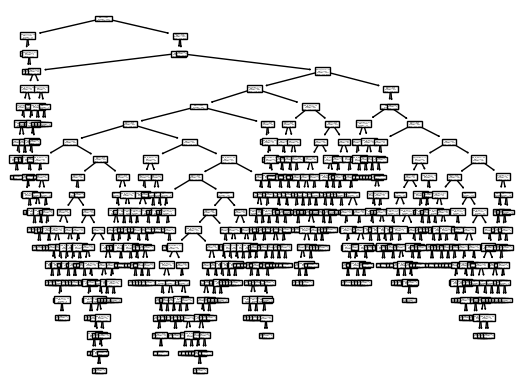

In [17]:
features = ["age","gender","device_type","ad_position", "time_of_day"]
X = df[features]
y = df['click']

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
tree.plot_tree(dtree, feature_names=features)

**GET PREDICTION**

In [26]:
print("Will the user click the ad (0:No, 1:Yes)", dtree.predict([[20, 1, 0, 3, 4]]))

Will the user click the ad (0:No, 1:Yes) [1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**FIT DATA INTO DECISION TREE - FIGURE OUT BEST TIME OF DAY**

[Text(0.637926333102493, 0.9705882352941176, 'gender <= 0.5\ngini = 0.749\nsamples = 1435\nvalue = [358, 331, 373, 373]'),
 Text(0.4476172957063712, 0.9117647058823529, 'age <= 53.5\ngini = 0.744\nsamples = 930\nvalue = [216, 182, 256, 276]'),
 Text(0.5427718144044321, 0.9411764705882353, 'True  '),
 Text(0.3129284972299169, 0.8529411764705882, 'age <= 48.5\ngini = 0.745\nsamples = 740\nvalue = [186.0, 154.0, 177.0, 223.0]'),
 Text(0.18666031855955678, 0.7941176470588235, 'age <= 31.5\ngini = 0.743\nsamples = 641\nvalue = [151, 130, 156, 204]'),
 Text(0.10429362880886427, 0.7352941176470589, 'age <= 25.5\ngini = 0.742\nsamples = 302\nvalue = [85, 53, 85, 79]'),
 Text(0.043524930747922436, 0.6764705882352942, 'device_type <= 0.5\ngini = 0.712\nsamples = 128\nvalue = [38, 16, 25, 49]'),
 Text(0.024930747922437674, 0.6176470588235294, 'click <= 0.5\ngini = 0.598\nsamples = 41\nvalue = [3.0, 4.0, 11.0, 23.0]'),
 Text(0.018836565096952907, 0.5588235294117647, 'ad_position <= 2.5\ngini = 0.7

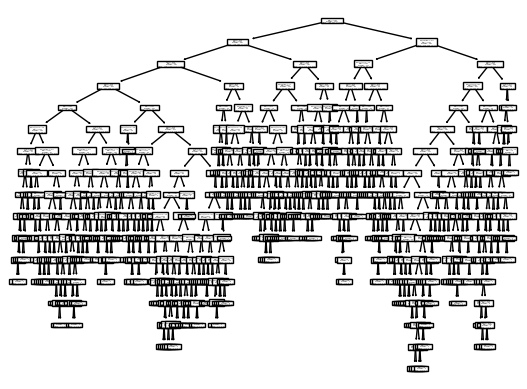

In [12]:
features = ["age","gender","device_type","ad_position", "click"]
X = df[features]
y = df['time_of_day']

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
tree.plot_tree(dtree, feature_names=features)

In [25]:
print("Best time of day to show ad (1:Morning, 2:Afternoon, 3:Evening, 4:Night):", dtree.predict([[20, 1, 0, 3, 0]]))

Best time of day to show ad (1:Morning, 2:Afternoon, 3:Evening, 4:Night): [1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
def run_model():
  age = int(input("How old are you: "))
  gender = input("What is your gender: ")
  device_type = input("What device are you using: ")